## Importations et chargement

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_path = 'data/CES19.csv'


In [4]:
dataframe = pd.read_csv(csv_path)
dataframe.head()

df_columns = dataframe.columns

C:\Users\Melvin\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (25,27,28,30,31,33,34,39,179,181,188,192,193,199,210,227,234,236,237,239,240,243,276,299,302,311,314,315,316,327,362,417,418,421,422,423,424,425,431,464,465,468,538,541,578,579,582,583,584) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Quelques statistiques sur nos colonnes et leur distribution: 

In [5]:
print(df_columns)
print(f"\nIl y a {len(df_columns)} attributs.\n")
print(dataframe.index)
print("Description : \n", dataframe.describe())

Index(['Unnamed: 0', 'cps19_StartDate', 'cps19_EndDate', 'cps19_ResponseId',
       'cps19_consent', 'cps19_citizenship', 'cps19_yob', 'cps19_yob_2001_age',
       'cps19_gender', 'cps19_province',
       ...
       'split_vol_assoc', 'pes19_data_quality', 'pes19_panel', 'pes19_age',
       'pes19_duplicates_flag', 'pes19_inattentive',
       'cps19_weight_general_all', 'cps19_weight_general_restricted',
       'pes19_weight_general_all', 'pes19_weight_general_restricted'],
      dtype='object', length=621)

Il y a 621 attributs.

RangeIndex(start=0, stop=37822, step=1)
Description : 
          Unnamed: 0     cps19_yob  cps19_yob_2001_age  cps19_interest_gen_1  \
count  37822.000000  37822.000000               293.0          35409.000000   
mean   18911.500000   1970.308709                18.0              6.453077   
std    10918.415277     16.611707                 0.0              2.478729   
min        1.000000   1920.000000                18.0              0.000000   
25%     9456

### Q1 
Il y a **37822 individus** et **621 attributs**.

In [6]:
na_df = dataframe.isna()


### Q2

In [7]:
columns_without_missing = [ column for column in na_df.columns if not na_df[column].any()]
print(f"Il y a {len(columns_without_missing)} colonnes sans aucune valeur manquante")

Il y a 60 colonnes sans aucune valeur manquante


### Q3

In [8]:
def count(column):
    return(np.sum(column))

count_na_df = na_df.copy().apply(count)

In [9]:
print(count_na_df)

Unnamed: 0                             0
cps19_StartDate                        0
cps19_EndDate                          0
cps19_ResponseId                       0
cps19_consent                          0
                                   ...  
pes19_inattentive                  27482
cps19_weight_general_all              89
cps19_weight_general_restricted     4000
pes19_weight_general_all           27497
pes19_weight_general_restricted    29523
Length: 621, dtype: int64


Text(0, 0.5, "# d'attributs")

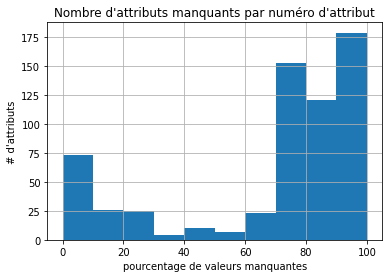

In [24]:
histPlot = (count_na_df/len(dataframe
                            )*100).hist(bins=10)
plt.title("Nombre d'attributs manquants par numéro d'attribut")
plt.xlabel("pourcentage de valeurs manquantes")
plt.ylabel("# d'attributs")


On constate que l'écrasante majorité des attributs (125+150+175 / 600 = 75%) a plus de 25000 valeurs manquantes ce qui est énorme.

### Q4

In [11]:

print(pd.Timestamp(dataframe["cps19_StartDate"][0]))

ts_election = pd.Timestamp(year =2019,month =10,day =21).timestamp()
print(ts_election)
ts_dates= dataframe["cps19_StartDate"].apply((lambda x: pd.Timestamp(x).timestamp()) )

2019-09-13 04:09:44
1571616000.0


In [12]:
print(ts_dates.count())
ts_dates = ts_dates[ts_dates>=ts_election]

37822


In [13]:
print(f"Il y a {ts_dates.count()} personnes ayant voté le jour de l'élection ou après")

Il y a 134 personnes ayant voté le jour de l'élection ou après


### Q5

![](2022-01-28-11-40-24.png)

### Q6

![](2022-01-28-11-44-10.png)

### Q7

In [14]:
filtered_df = dataframe[(dataframe["cps19_yob"]==1979) | (dataframe["cps19_citizenship"] == "Permanent resident")]
print(f"Il y a { len(filtered_df.index) } personnes qui ont le statut de résident permanent ou qui sont nés en 1979")

Il y a 1951 personnes qui ont le statut de résident permanent ou qui sont nés en 1979


### Q8

In [15]:
dataframe.iloc[101][["cps19_citizenship","cps19_yob"]]

cps19_citizenship    Canadian citizen
cps19_yob                        1982
Name: 101, dtype: object

### Q9

In [16]:
answer_columns = [column for column in df_columns if "cps19_lead_int" in column]
print(answer_columns)
print(dataframe[answer_columns].head())

['cps19_lead_int_113', 'cps19_lead_int_114', 'cps19_lead_int_115', 'cps19_lead_int_116', 'cps19_lead_int_117', 'cps19_lead_int_118', 'cps19_lead_int_119', 'cps19_lead_int_120']
  cps19_lead_int_113 cps19_lead_int_114 cps19_lead_int_115 cps19_lead_int_116  \
0     Justin Trudeau                NaN      Jagmeet Singh                NaN   
1                NaN                NaN                NaN                NaN   
2     Justin Trudeau                NaN                NaN                NaN   
3                NaN      Andrew Scheer                NaN                NaN   
4                NaN      Andrew Scheer      Jagmeet Singh                NaN   

  cps19_lead_int_117 cps19_lead_int_118 cps19_lead_int_119  \
0      Elizabeth May                NaN                NaN   
1                NaN                NaN                NaN   
2                NaN                NaN                NaN   
3                NaN                NaN                NaN   
4                NaN      

### Q10

In [17]:
# On exclut la dernière possibilité où les personnes répondent "je ne sais pas"
answer_columns_names = answer_columns[:-1]

# Count permet de compter les éléments qui ne sont pas "NaN"
# Selon l'axe 1 signifie que l'on compte le nombre de colonnes qui n'ont pas de NaN pour chaque ligne
compte_intelligents_df = dataframe[answer_columns_names].count(axis=1)

compte_intelligents_filtre_df = compte_intelligents_df[compte_intelligents_df>=3]
print(f"Il y a {len(compte_intelligents_filtre_df) } personnes qui considèrent plus de 3 dirigeants comme intelligents")


Il y a 13311 personnes qui considèrent plus de 3 dirigeants comme intelligents


### Q11

In [18]:
print("Réponses uniques pour les choix de vote: ", dataframe["cps19_votechoice"].unique())
# Le parti rhinocéros sera certainement sous l'appellation "Another party"

votechoice_columns = [column for column in df_columns if "cps19_votechoice" in column]
print("Noms de colonne contenant votechoice: ",votechoice_columns)

# La colonne qui nous intéresse est cps19_votechoice_7_TEXT 
nom_colonne_texte = "cps19_votechoice_7_TEXT"

# On va récupérer toutes les réponses qui contiennent vraiment du texte et uniquement celles ci
colonnes_texte_filtre_df = dataframe[ ~dataframe.isna()[nom_colonne_texte] ][nom_colonne_texte]

# Et on va maintenant chercher toutes les réponses qui contiennent "rhin" en référence au parti rhinocéros
# on fera attention aux majuscules d'où l'emploi de .lower()
reponses_rhino = [texte for texte in colonnes_texte_filtre_df if "rhin" in texte.lower()]

print(f"Il y a {len(reponses_rhino)} personnes qui comptent voter pour le parti Rhinocéros")

Réponses uniques pour les choix de vote:  ['Green Party' "Don't know/ Prefer not to answer" 'Liberal Party'
 'Conservative Party' nan 'ndp' 'Another party (please specify)'
 'Bloc Qu<e9>b<e9>cois' "People's Party"]
Noms de colonne contenant votechoice:  ['cps19_votechoice', 'cps19_votechoice_7_TEXT', 'cps19_votechoice_pr', 'cps19_votechoice_pr_7_TEXT']
Il y a 12 personnes qui comptent voter pour le parti Rhinocéros
